In [133]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#dataset import
dataset = pd.read_csv('Oxides_firstnumpy.csv') #You need to change #directory accordingly
dataset.head(10) #Return 10 rows of data

,Atom1,Atom2,Atom3,Atom4,Perovskite_label
0,83,26,13,8,0
1,56,38,52,8,0
2,82,27,75,8,0
3,20,38,74,8,1
4,3,24,32,8,0
5,57,11,77,8,1
6,20,30,6,8,0
7,56,57,51,8,0
8,71,24,5,8,0
9,19,11,23,8,0


<AxesSubplot:>

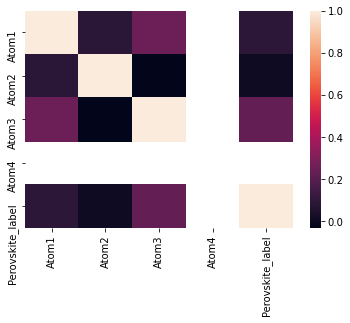

In [119]:
import seaborn as sns
import matplotlib as plt
corr = dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [120]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:4].values
y = dataset.iloc[:,4:5].values

In [122]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

max_abs_scaler = preprocessing.MinMaxScaler()
X = max_abs_scaler.fit_transform(X)

#max_abs_scaler = preprocessing.StandardScaler()
#X = max_abs_scaler.fit_transform(X)

In [123]:
X

array([[0.8988764 , 0.25842697, 0.11235955, 0.        ],
       [0.59550562, 0.39325843, 0.5505618 , 0.        ],
       [0.88764045, 0.26966292, 0.80898876, 0.        ],
       ...,
       [0.        , 0.20224719, 0.34831461, 0.        ],
       [0.19101124, 0.26966292, 0.12359551, 0.        ],
       [0.58426966, 0.02247191, 0.12359551, 0.        ]])

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Neural network

model = Sequential()

model.add(Dense(2000, activation='relu', input_shape=(4,)))
model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(1800, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())


model.add(Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())



model.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())



model.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1,validation_data=(X_test,y_test))
model.evaluate(X_test, y_test)[1]

ModuleNotFoundError: No module named 'keras'

In [156]:
def build_model_hp(hp):
    n_layers = hp.Int(name='n_layers', min_value=1, max_value=10, step=1)
    n_neurons = hp.Int(name=f'n_neurons', min_value=10, max_value=1000, step=10)
    model = build_model(n_layers, n_neurons)
    return model

In [169]:
def build_model(n_layers, n_neurons, flattern=False, shape=None, top_value = 0.1 ,input_dim=4, input_shape=(3, 3), activation='relu', kernel_initializer='uniform', optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy']):
    # top_value is a percent of size for last hidden layer (first layer is 100% = 1)
    model = keras.Sequential()
    if not n_layers == 1:
        step = (1 - top_value) / (n_layers-1)
    for n in range(0, n_layers):
        if n == 0:
            if flattern:
                model.add(keras.layers.Flatten(input_shape=shape))
                model.add(keras.layers.Dense(units=n_neurons, activation=activation, kernel_initializer=kernel_initializer))
            else:
                model.add(keras.layers.Dense(units=n_neurons, activation=activation,kernel_initializer=kernel_initializer, input_dim=input_dim))
        else:
            percentage = 1-step*n
            number = int(n_neurons*percentage)
            if number <= 1:
                number = 2
            model.add(keras.layers.Dense(units=number, activation=activation, kernel_initializer=kernel_initializer))
        model.add(keras.layers.Dropout(0.50))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer, loss, metrics)
    return model

In [ ]:
import numpy as np
from tensorflow import keras

In [ ]:
import numpy as np
from kerastuner.tuners import BayesianOptimization

tuner = BayesianOptimization(
    build_model_hp,
    objective='val_accuracy',
    max_trials=500,
    num_initial_points=10,
    #directory='D:\\models\\ABX3+ABO3 n Bayes',
    project_name='pyramid'
)

tuner.search(X_train, y_train, epochs=500, validation_data=(X_test, y_test), batch_size=64)
tuner.results_summary()

models = tuner.get_best_models(num_models=10)
for iteration, model in enumerate(models):
    print('n:', iteration)

    model.summary()

    print("Test: ")

    model.evaluate(test_data, test_labels)

    print("Training: ")

    model.evaluate(training_data, training_labels)

    # if iteration == 8:
    #     model.save("M_abx3+abo3_n_tr82.77ts86.96")

Trial 271 Complete [00h 02m 11s]
val_accuracy: 0.7892376780509949

Best val_accuracy So Far: 0.7982062697410583
Total elapsed time: 18h 44m 17s

Search: Running Trial #272

Hyperparameter    |Value             |Best Value So Far 
n_layers          |3                 |5                 
n_neurons         |1000              |940               

Epoch 1/500
9/9 [==============================] - 0s 40ms/step - loss: 0.6876 - accuracy: 0.5962 - val_loss: 0.6827 - val_accuracy: 0.5785
Epoch 2/500
9/9 [==============================] - 0s 15ms/step - loss: 0.6777 - accuracy: 0.6135 - val_loss: 0.6860 - val_accuracy: 0.5785
Epoch 3/500
9/9 [==============================] - 0s 14ms/step - loss: 0.6746 - accuracy: 0.6135 - val_loss: 0.6721 - val_accuracy: 0.5785
Epoch 4/500
9/9 [==============================] - 0s 14ms/step - loss: 0.6650 - accuracy: 0.6135 - val_loss: 0.6619 - val_accuracy: 0.5785
Epoch 5/500
9/9 [==============================] - 0s 14ms/step - loss: 0.6538 - accuracy: 0.61

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

auc_keras = auc(fpr_keras, tpr_keras)


from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.4)
plt.ylim(0.6, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# Validation curve

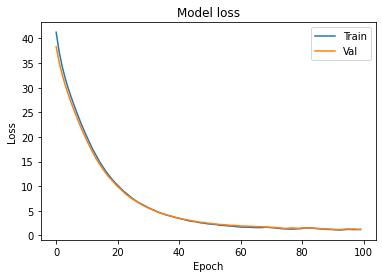

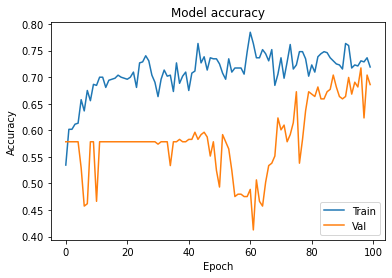

In [135]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


# SUMMARY

In [64]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 5         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [63]:
for layer in model.layers:
    weights = layer.get_weights()

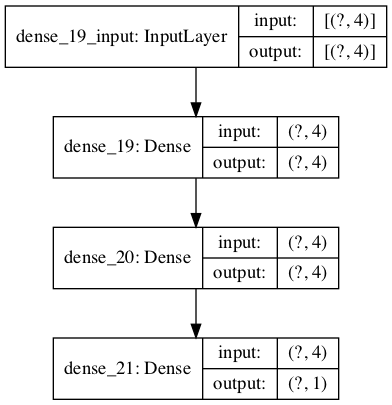

In [65]:
from keras.utils import plot_model
plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

In [67]:
y_pred = model.predict_classes(X_test)

In [68]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

6/6 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.7204
[0.5501977205276489, 0.7204301357269287]


# Bayesian

In [102]:
# bounds for hyper-parameters in mnist model
# the bounds dict should be in order of continuous type and then discrete type
bounds = [{'name': 'validation_split', 'type': 'continuous',  'domain': (0.0, 0.3)},
          {'name': 'l1_drop',          'type': 'continuous',  'domain': (0.0, 0.3)},
          {'name': 'l2_drop',          'type': 'continuous',  'domain': (0.0, 0.3)},
          {'name': 'l1_out',           'type': 'discrete',    'domain': (64, 128, 256, 512, 1024)},
          {'name': 'l2_out',           'type': 'discrete',    'domain': (64, 128, 256, 512, 1024)},
          {'name': 'batch_size',       'type': 'discrete',    'domain': (10, 100, 500)},
          {'name': 'epochs',           'type': 'discrete',    'domain': (5, 10, 20)}]